#### **Task 4**: How taxi times changing during the day? Does higher traffic lead to bigger taxi times?

In [1]:
import pandas as pd
import numpy as np
import datetime
import seaborn as sns
pd.set_option('display.max_rows', None)

In [2]:
df_flights = pd.read_csv(r'..\..\2_data\flights_random_sample.csv', sep=',')
df_flights.head()

,fl_date,mkt_unique_carrier,branded_code_share,mkt_carrier,mkt_carrier_fl_num,op_unique_carrier,tail_num,op_carrier_fl_num,origin_airport_id,origin,...,distance,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,first_dep_time,total_add_gtime,longest_add_gtime,no_name
0,2018-01-01,WN,WN,WN,5431,WN,N291WN,5431,12889,LAS,...,986,1.0,0.0,0.0,0.0,18.0,NaN,NaN,NaN,NaN
1,2018-01-01,WN,WN,WN,989,WN,N287WN,989,12889,LAS,...,1099,0.0,0.0,11.0,0.0,35.0,NaN,NaN,NaN,NaN
2,2018-01-01,WN,WN,WN,1664,WN,N751SW,1664,12889,LAS,...,1099,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2018-01-01,WN,WN,WN,1106,WN,N704SW,1106,12889,LAS,...,197,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2018-01-01,WN,WN,WN,1559,WN,N423WN,1559,12889,LAS,...,197,37.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN


In [3]:
filter = df_flights[['taxi_out','dep_time','flights']]
filter.head()

,taxi_out,dep_time,flights
0,9.0,2005.0,1
1,11.0,2200.0,1
2,11.0,646.0,1
3,10.0,737.0,1
4,13.0,1821.0,1


In [4]:
filter.shape

(100998, 3)

In [5]:
filter.isnull().sum()

taxi_out    1660
dep_time    1573
flights        0
dtype: int64

In [6]:
filter = filter.dropna()

In [9]:
filter.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99338 entries, 0 to 100997
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   taxi_out  99338 non-null  float64
 1   dep_time  99338 non-null  float64
 2   flights   99338 non-null  int64  
dtypes: float64(2), int64(1)
memory usage: 3.0 MB


In [10]:
filter['dep_time'] = filter['dep_time'].astype(int)

In [11]:
filter['dep_time'] = pd.to_datetime(filter['dep_time'], format = '%H%M', errors = 'coerce')
filter.head()

,taxi_out,dep_time,flights
0,9.0,1900-01-01 20:05:00,1
1,11.0,1900-01-01 22:00:00,1
2,11.0,1900-01-01 06:46:00,1
3,10.0,1900-01-01 07:37:00,1
4,13.0,1900-01-01 18:21:00,1


In [12]:
filter['dep_time_hour'] = filter['dep_time'].dt.hour
# # filter['dep_time_min'] = filter['dep_time'].dt.minute
# filter['dep_time'] = filter['dep_time'].dt.time
filter.head()

,taxi_out,dep_time,flights,dep_time_hour
0,9.0,1900-01-01 20:05:00,1,20.0
1,11.0,1900-01-01 22:00:00,1,22.0
2,11.0,1900-01-01 06:46:00,1,6.0
3,10.0,1900-01-01 07:37:00,1,7.0
4,13.0,1900-01-01 18:21:00,1,18.0


In [21]:
filter.drop('dep_time', axis=1, inplace=True)

In [22]:
taxi_by_dep_time = filter.groupby('dep_time_hour', as_index=False).mean('taxi_out').sort_values('dep_time_hour')
taxi_by_dep_time.head()

,dep_time_hour,taxi_out,flights
0,1.0,15.746032,1.0
1,2.0,14.190476,1.0
2,3.0,15.116667,1.0
3,4.0,14.847682,1.0
4,5.0,16.185120,1.0


<AxesSubplot: xlabel='dep_time_hour', ylabel='taxi_out'>

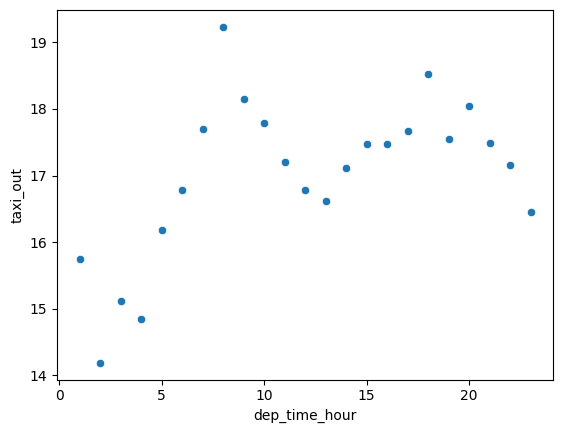

In [23]:
sns.scatterplot(taxi_by_dep_time, x='dep_time_hour', y='taxi_out')

In [24]:
taxi_by_traffic_volume = filter.groupby('dep_time_hour', as_index=False).agg(
                        {'taxi_out':'mean', 
                         'flights':'sum'
                         })
taxi_by_traffic_volume

,dep_time_hour,taxi_out,flights
0,1.0,15.746032,63
1,2.0,14.190476,84
2,3.0,15.116667,120
3,4.0,14.847682,302
4,5.0,16.185120,3992
5,6.0,16.777169,6202
6,7.0,17.701937,6039
7,8.0,19.231413,6093
8,9.0,18.143173,5874
9,10.0,17.788841,5986


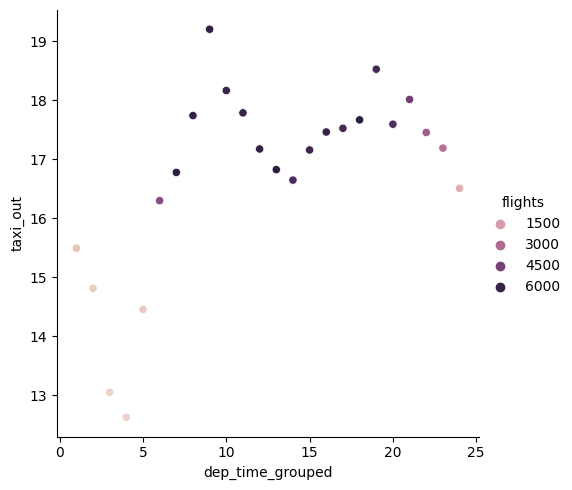

In [20]:
g = sns.relplot(data=taxi_by_traffic_volume, x='dep_time_grouped', y='taxi_out', hue='flights')

#### Early morning flights tend to have a lower mean taxi time, which corresponds to a much lower volume of flights. Peak taxi times are mid-morning and early evening, with a dip mid-afternoon.

#### Implications for Feature Engineering:
- see if taxi_out / taxi_in time is correlated with arrival delay
- if so - try grouping taxi_out / taxi_in time into early morning, late morning, early afternoon, late afternoon, evening
- run clustering on above to identify best divisions of the day to use?